In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
mov=pd.read_csv("movie_metadata.csv")
print(mov.columns.values)
labels=mov["imdb_score"]
mov.drop(["imdb_score", "aspect_ratio", "movie_imdb_link"], inplace=True, axis=1)

['color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_3_facebook_likes' 'actor_2_name'
 'actor_1_facebook_likes' 'gross' 'genres' 'actor_1_name' 'movie_title'
 'num_voted_users' 'cast_total_facebook_likes' 'actor_3_name'
 'facenumber_in_poster' 'plot_keywords' 'movie_imdb_link'
 'num_user_for_reviews' 'language' 'country' 'content_rating' 'budget'
 'title_year' 'actor_2_facebook_likes' 'imdb_score' 'aspect_ratio'
 'movie_facebook_likes']


In [5]:
numeric_features=mov._get_numeric_data().columns.values.tolist()

text_features=mov.columns.values.tolist()
text_features=[i for i in text_features if i not in numeric_features]



string_features=["movie_title", "plot_keywords"]

categorical_features=[i for i in text_features if i not in string_features]

numeric_features.remove("title_year") 
categorical_features.append("title_year")

### Title_year  is categorical
###all the others can be considered continuous 
###(See about facenumber_in_poster too)

# Exploration

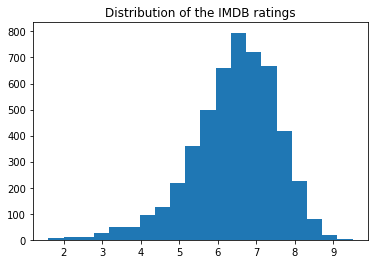

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
font = {'fontname':'Arial', 'size':'14'}
title_font = { 'weight' : 'bold','size':'16'}
plt.hist(labels, bins=20)
plt.title("Distribution of the IMDB ratings")
plt.show()

# Numeric features : imputation and scaling 

In [7]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler 
## we use standard scaler to keep as much variance as possible (compared to minmax)
imp=Imputer(missing_values='NaN',strategy="most_frequent", axis=0)
mov[numeric_features]=imp.fit_transform(mov[numeric_features])

scl=StandardScaler()
mov[numeric_features]=scl.fit_transform(mov[numeric_features])

mov[numeric_features].head() 

D:\ANACONDA\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes
0,4.797503,2.814318,-0.241367,0.125431,-0.369902,11.160073,5.795674,-0.267871,-0.679747,7.369256,1.016877,-0.176884,1.318632
1,1.340129,2.456819,-0.039256,0.212714,2.228319,4.168026,2.798784,2.128121,-0.679747,2.559467,1.338521,0.829814,-0.389572
2,3.803816,1.622653,-0.241367,-0.292328,0.296309,2.473418,1.388010,0.110172,-0.182725,1.913218,1.057721,-0.311391,4.010348
3,5.536609,2.258208,7.656405,13.455777,1.362246,6.318278,7.659834,5.344122,-0.679747,6.434314,1.083248,5.288616,8.099687
4,-1.131770,-0.681231,-0.194340,0.212714,-0.427796,-0.581219,-0.604169,-0.526157,-0.679747,-0.716805,-0.091008,-0.405769,-0.389572


# Correlation of the numeric features with th IMDB score

In [8]:
import operator

from scipy.stats import pearsonr
correl={}
for f in numeric_features:
    correl[f]=pearsonr(mov[f], labels)
sorted_cor = sorted(correl.items(), key=operator.itemgetter(1), reverse=True)
print (sorted_cor)

[('num_voted_users', (0.4109652002703472, 8.561420234981293e-205)), ('num_critic_for_reviews', (0.2997128320107673, 3.499917497993284e-105)), ('num_user_for_reviews', (0.28978692443885773, 3.7438372081606225e-98)), ('duration', (0.2610706485657786, 2.2913365138738415e-79)), ('movie_facebook_likes', (0.24704851902725028, 5.26928820566599e-71)), ('gross', (0.17636050188406846, 1.6379676123144198e-36)), ('director_facebook_likes', (0.16246759578590034, 3.5875676939989255e-31)), ('cast_total_facebook_likes', (0.08578734754800735, 1.0484736266089975e-09)), ('actor_2_facebook_likes', (0.08355072713369639, 2.812236914134845e-09)), ('actor_1_facebook_likes', (0.07586676050935895, 6.888788561799105e-08)), ('actor_3_facebook_likes', (0.05279597934518547, 0.0001761695769764363)), ('budget', (0.02735720739697167, 0.05206100536210327)), ('facenumber_in_poster', (-0.062210931032976265, 9.822719464157489e-06))]


## correlation of the numeric feature between them 

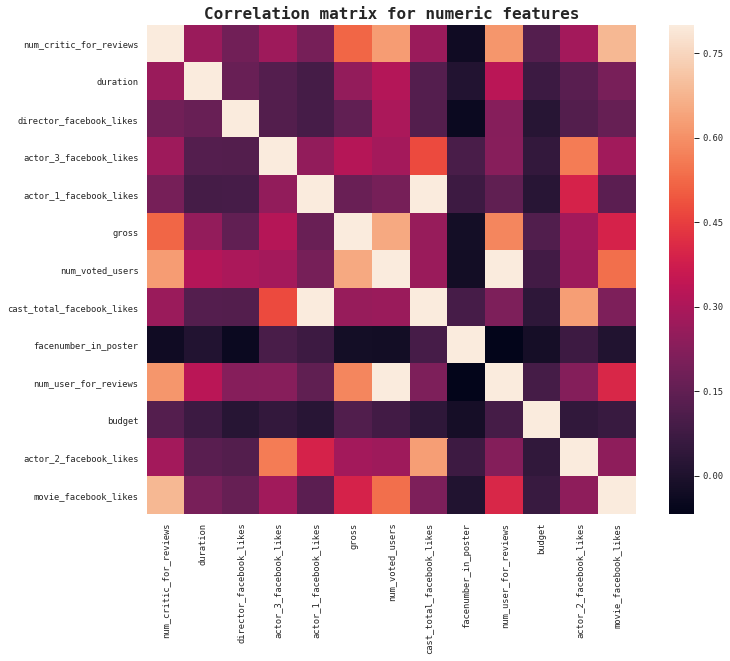

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
def corrmap(features, title):
    sns.set(context="paper", font="monospace")
    corrmat = mov[features].corr()
    f, ax = plt.subplots(figsize=(12, 9))
    plt.title(title, **title_font)
# Draw the heatmap using seaborn
    sns.heatmap(corrmat, vmax=.8, square=True)
corrmap(numeric_features,"Correlation matrix for numeric features")

In [10]:
mov["movie_success"]=(mov['num_critic_for_reviews']+mov["num_voted_users"]
                +mov["num_user_for_reviews"]+mov["gross"]+mov["movie_facebook_likes"])/6
mov["other_actors_facebook_likes"]=mov["actor_2_facebook_likes"]+mov["actor_3_facebook_likes"]
num_features_2=[x for x in numeric_features if x not in ["cast_total_facebook_likes",
                                                         'num_critic_for_reviews',
                                                         "num_voted_users",
                                                         "num_user_for_reviews",
                                                        "gross","movie_facebook_likes",
                                                        "actor_2_facebook_likes",
                                                        "actor_3_facebook_likes"]]
num_features_2.extend(["movie_success", "other_actors_facebook_likes"])

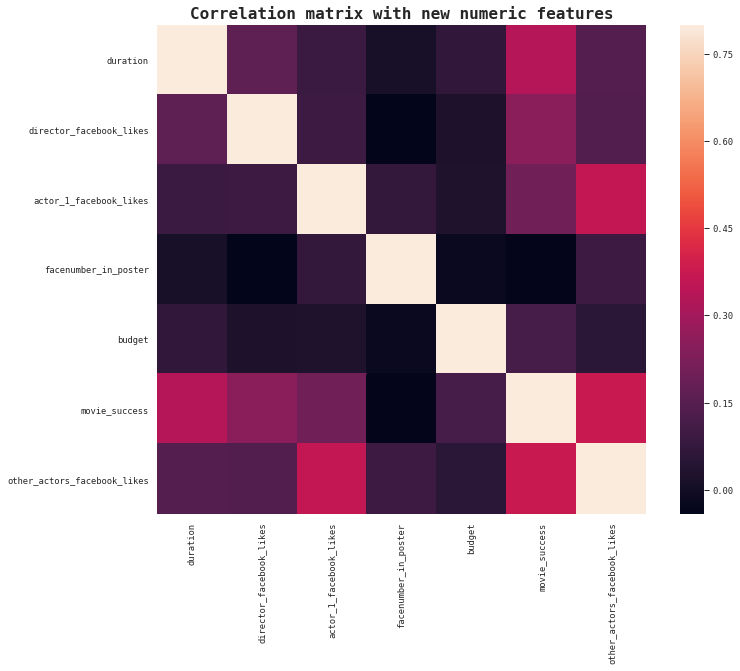

In [11]:
corrmap(num_features_2, "Correlation matrix with new numeric features")

In [12]:
import operator

from scipy.stats import pearsonr
correl={}
for f in num_features_2:
    correl[f]=pearsonr(mov[f], labels)
sorted_cor = sorted(correl.items(), key=operator.itemgetter(1), reverse=True)
print (sorted_cor)

[('movie_success', (0.34937713438252105, 1.0101947957161183e-144)), ('duration', (0.2610706485657786, 2.2913365138738415e-79)), ('director_facebook_likes', (0.16246759578590034, 3.5875676939989255e-31)), ('other_actors_facebook_likes', (0.07721012413561174, 4.0229082089507694e-08)), ('actor_1_facebook_likes', (0.07586676050935895, 6.888788561799105e-08)), ('budget', (0.02735720739697167, 0.05206100536210327)), ('facenumber_in_poster', (-0.062210931032976265, 9.822719464157489e-06))]


In [13]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(max_features="sqrt")
parameters={ "max_depth":[5,8,25], 
             "min_samples_split":[1,2,5], "n_estimators":[800,1200]}
             

In [18]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RFR, parameters)
clf.fit(mov[num_features_2],labels)

D:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

In [19]:
from operator import itemgetter
# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")
report(clf.cv_results_)

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

# Introducing categorical features

In [74]:
for feat in categorical_features:
    mov=pd.concat([mov, pd.get_dummies(mov[feat], prefix=feat, dummy_na=True)],axis=1)

In [75]:
cat_dummies=[i for i in mov.columns.values.tolist() if i not in numeric_features]
cat_dummies=[i for i in cat_dummies if i not in text_features]
cat_dummies.remove("title_year")
cat_dummies[-5:]

['title_year_2013.0',
 'title_year_2014.0',
 'title_year_2015.0',
 'title_year_2016.0',
 'title_year_nan']

In [76]:
import operator

from scipy.stats import pearsonr
correl={}
for f in cat_dummies:
    correl[f]=pearsonr(mov[f], labels)
sorted_cor = sorted(correl.items(), key=operator.itemgetter(1), reverse=True)

print (sorted_cor[0:10])
print("")
print (sorted_cor[-10:])

D:\ANACONDA\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
D:\ANACONDA\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


[('movie_success', (0.34937713438252105, 1.0101947957161183e-144)), ('color_ Black and White', (0.14511424068479978, 3.8707674842160452e-25)), ('director_name_nan', (0.14265081749456854, 2.4404929097356446e-24)), ('genres_Drama', (0.09535203204148157, 1.1598805916698524e-11)), ('genres_Crime|Drama', (0.09021020331615656, 1.3835331053803418e-10)), ('genres_Drama|Romance', (0.0780356144939473, 2.8777460103141966e-08)), ('other_actors_facebook_likes', (0.07721012413561174, 4.0229082089507694e-08)), ('director_name_Christopher Nolan', (0.07025603635548693, 5.910990339111362e-07)), ('director_name_Martin Scorsese', (0.06830892326957612, 1.2016533611115477e-06)), ('director_name_Steven Spielberg', (0.06646178109547822, 2.315057531355703e-06))]

[('actor_3_name_Dave Allen', (-0.05563238329974575, 7.72534405357354e-05)), ('actor_3_name_Peter Wingfield', (-0.056859715462759385, 5.342655319313694e-05)), ('actor_3_name_Jennifer Sky', (-0.05685971546275939, 5.342655319313694e-05)), ('genres_Thrill

In [77]:
predictors=["movie_success","duration","director_facebook_likes", "title_year_nan", 
            "color_ Black and White",
            "director_name_nan", "country_UK", "content_rating_TV-MA", "genres_Drama",
            "genres_Crime|Drama", 'other_actors_facebook_likes','actor_1_facebook_likes',
           "content_rating_Approved", "genres_Drama|Romance", "title_year_2015.0", 
           "director_name_Jason Friedberg","genres_Horror","genres_Comedy|Romance","director_name_Uwe Boll", "country_USA","content_rating_PG-13","color_Color", "language_English"]

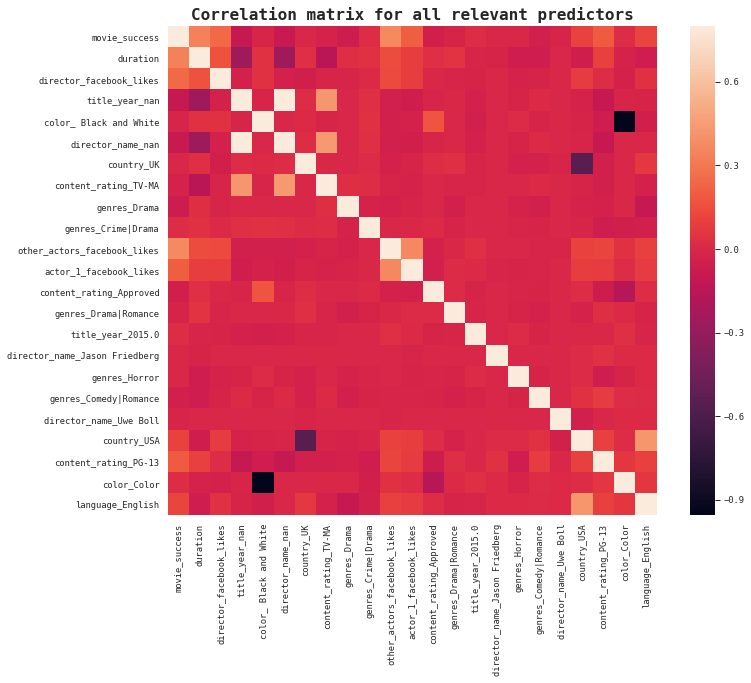

In [78]:
corrmap(predictors, "Correlation matrix for all relevant predictors")

In [79]:
predictors=["movie_success","duration","director_facebook_likes", "title_year_nan", 
            "color_ Black and White",
             "content_rating_TV-MA", "genres_Drama",
            "genres_Crime|Drama", 'other_actors_facebook_likes','actor_1_facebook_likes',
           "content_rating_Approved", "genres_Drama|Romance", "title_year_2015.0", 
           "director_name_Jason Friedberg","genres_Horror","genres_Comedy|Romance","director_name_Uwe Boll",
            "country_USA","content_rating_PG-13", "language_English"]

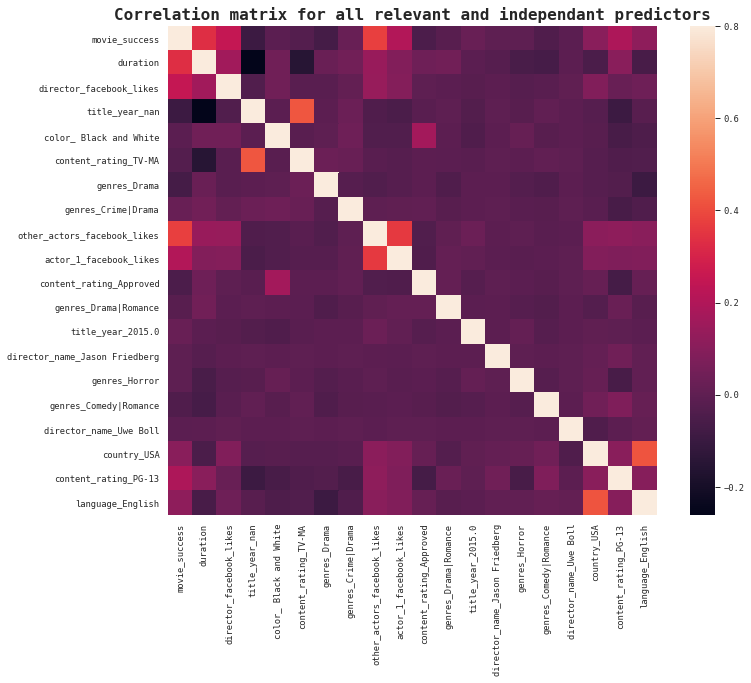

In [80]:
corrmap(predictors, "Correlation matrix for all relevant and independant predictors")

In [2]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(max_features="sqrt")
parameters={ "max_depth":[5,8,25], 
             "min_samples_split":[1,2,5], "n_estimators":[800,1200]}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RFR, parameters)
clf.fit(mov[predictors],labels)

NameError: name 'mov' is not defined

In [92]:

report(clf.grid_scores_)

NameError: name 'clf' is not defined

# Investigating the plot_keywords 

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
mov["plot_keywords"]=mov["plot_keywords"].fillna("None")

def token(text):
    return(text.split("|"))

cv=CountVectorizer(max_features=200,tokenizer=token )
plot_keywords_words=cv.fit_transform(mov["plot_keywords"])

plot_keywords_words=plot_keywords_words.toarray()

words = cv.get_feature_names()
words=["Keyword_"+w for w in words]

keywords=pd.DataFrame(plot_keywords_words, columns=words)

In [83]:
keys=[w for w in words if keywords[w].sum()>80] 
### takes the keywords that concern at least 80 (totally arbitrary) of the movies
len(keys)

9

In [84]:
mov=pd.concat([mov, keywords[keys]],axis=1)

In [85]:
num_cat_key_feat=predictors+keys
import operator

from scipy.stats import pearsonr
correl={}
for f in keys:
    correl[f]=pearsonr(mov[f], labels)
sorted_cor = sorted(correl.items(), key=operator.itemgetter(1), reverse=True)

print (sorted_cor[0:10])
print (sorted_cor[-10:])

[('Keyword_friend', (0.029938629225058334, 0.03350211130100427)), ('Keyword_police', (0.025285837308578436, 0.07257527103438378)), ('Keyword_love', (0.017657803131527695, 0.20993667392338783)), ('Keyword_death', (0.01130269456415836, 0.42227700238452825)), ('Keyword_new york city', (-0.009976783986355951, 0.4787377676198852)), ('Keyword_high school', (-0.010107273539675297, 0.47300447511436383)), ('Keyword_alien', (-0.02251484112423155, 0.10989237356513103)), ('Keyword_murder', (-0.022643202938536132, 0.10788034676015495)), ('Keyword_none', (-0.05492492242541858, 9.523497295247868e-05))]
[('Keyword_friend', (0.029938629225058334, 0.03350211130100427)), ('Keyword_police', (0.025285837308578436, 0.07257527103438378)), ('Keyword_love', (0.017657803131527695, 0.20993667392338783)), ('Keyword_death', (0.01130269456415836, 0.42227700238452825)), ('Keyword_new york city', (-0.009976783986355951, 0.4787377676198852)), ('Keyword_high school', (-0.010107273539675297, 0.47300447511436383)), ('Key

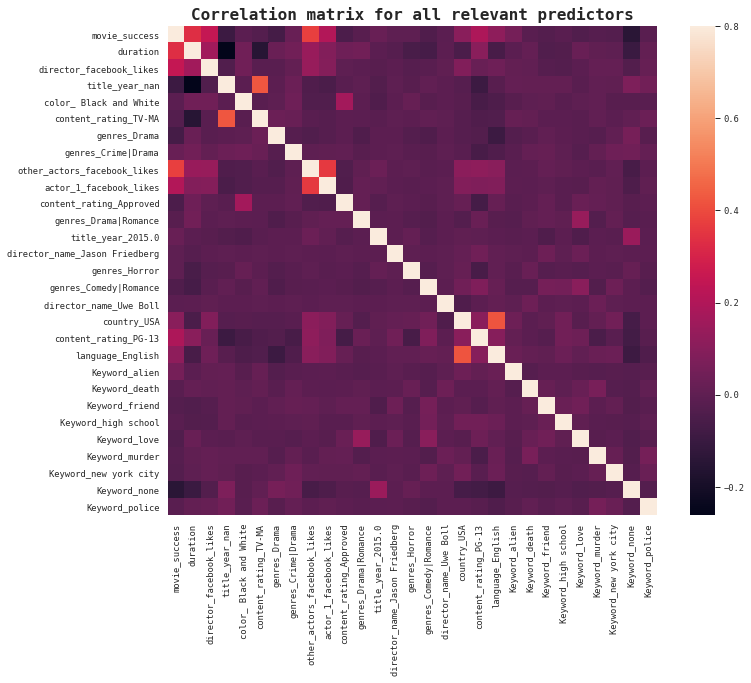

In [86]:
corrmap(predictors+keys, "Correlation matrix for all relevant predictors")

In [108]:
from sklearn.ensemble import RandomForestRegressor

RFR=RandomForestRegressor(max_features="sqrt")
parameters={ "max_depth":[2,5,8,25], 
             "min_samples_split":[1,2,5], "n_estimators":[800,1200]}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RFR, parameters)
clf.fit(mov[num_cat_key_feat],labels)

D:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

In [24]:
report(clf.cv_results_)

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'